 # hackathon 4:  Clustering - GMM
 ----
  
  University : UTEC \\
  Course       : ML \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Clustering \\
  End      :     10:55
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4:  (%)

 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**

#1. DataSet

The database has images of people with different facial experiences. Their task will be to group the characteristic vectors that represent these images in clusters where each clister has images of the same person.


The database contains 450 face images, with a resolution of 896 x 592 pixels, in JPEG format. It includes approximately 27 unique people with different lighting conditions, expressions, and backgrounds.


You can use any of the methods you have learned to obtain the feacture vector. For example PCA to obtain the eigefaces. Look in your collabs above how to do this in case I don't remember.



Link dataset: [Clik Here](https://drive.google.com/drive/folders/17JamahfFV7TxSROfkRofksisb5fcaqCA?usp=sharing)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  2. Vector Feature and Dimension Reduction

You can use the methods learned in other colabs to obtain the characteristic vectors and reduce the dimension.

For this stage, you should use PCA, t-SNE y  UMAP
You can use the sklearn library for this purpose.

For [PCA](https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html), determine the smallest value that retains most of the information, significantly greater than 90%. For [t-SNE](https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html) and [UMAP](https://umap-learn.readthedocs.io/en/latest/), reduce the data to 3 and 2 dimensions, respectively


In [ ]:
import os
# path = '/content/drive/Shared drives/ML-Proyecto-3/faces'
path = 'faces'
os.listdir(path)

'ImageData.mat'

In [ ]:
# Data Normalizing
def normalizacion(data):
  return data/np.linalg.norm(data)
 # write your code here

In [ ]:
import os
import numpy as np
import cv2  # for image processing
from sklearn.preprocessing import LabelEncoder

def load_jpg_data(folder_path):
    """Loads .jpg images from a folder, resizes them, flattens them, and assigns labels."""
    images = []
    labels = []
    label_names = sorted(os.listdir(folder_path))
    m, n = 896, 592
    
    for label in label_names:
        label_path = os.path.join(folder_path, label)
        if label_path.endswith('.jpg'):
            image = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (n, m))
            
            images.append(image.flatten())
            labels.append(label)

    images = np.array(images).T
    le = LabelEncoder()
    y = le.fit_transform(labels)
    print("Total dataset size:")
    print(f"n_samples: {images.shape[1]}")
    print(f"n_features: {m*n}")
    print(f"n_classes: {len(np.unique(y))}")
    return images, y, m, n

# Example usage:
X, Y, m, n = load_jpg_data('faces')

print(X.shape)
print(Y.shape)
print(m)
print(n)

Total dataset size:
n_samples: 450
n_features: 530432
n_classes: 450
(530432, 450)
(450,)
896
592




---
# Metodo 2


In [30]:
images=[]
for filename in os.listdir(path):
    img=cv2.imread(os.path.join(path,filename),cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img_resided = cv2.resize(img, (896, 592))
        images.append(img_resided.flatten())

X = np.array(images)

In [31]:
print(X.shape)

(450, 530432)


X_pca:  (450, 159)


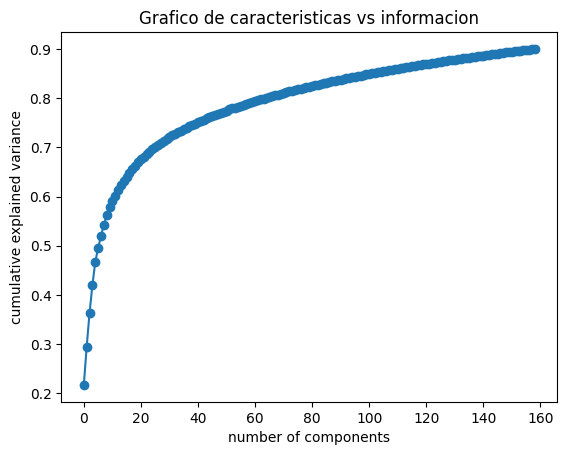

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

variance=0.9
pca = PCA(n_components=variance)
X_pca = pca.fit_transform(X)

print("X_pca: ", X_pca.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_), "-o")
plt.title("Grafico de caracteristicas vs informacion")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# 3 Clustering and evaluation

You used the Gaussian Mixture model from SKLEARN to cluster the dataset and compared it with other clustering algorithms, such as K-means and DBSCAN. To evaluate the quality of the clusters generated by each model, you employed internal metrics like the Silhouette Coefficient, the Davies-Bouldin Index, and the Dunn Index. These metrics allowed for an analysis of cluster compactness and separation, providing a detailed and comprehensive comparison between the models.

In [ ]:
# Write your code here

# 4. Clustering visualization

Project the elements of each cluster into a 2D space, then plot the points, assigning a unique color to each cluster to visualize the separation between them. Randomly select 10 images from each group and display them on the screen, allowing a visual check to determine if the images indeed belong to the same person.

In [ ]:
#Write your code here